In [2]:
!s3# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/bin/bash: s3#: command not found
/kaggle/input/fitness-tracker-dataset/gym_members_exercise_tracking_synthetic_data.csv


In [2]:
df=pd.read_csv("/kaggle/input/fitness-tracker-dataset/gym_members_exercise_tracking_synthetic_data.csv")
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83


In [3]:
import numpy as np

In [4]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset into a pandas DataFrame
# Replace 'your_dataset.csv' with the actual path to your dataset
df = pd.read_csv("/kaggle/input/fitness-tracker-dataset/gym_members_exercise_tracking_synthetic_data.csv")

# Step 3: Display the first few rows of the dataset to understand its structure
print(df.head())


    Age  Gender  Weight (kg)  Height (m) Max_BPM  Avg_BPM  Resting_BPM  \
0  34.0  Female         86.7        1.86     174    152.0         74.0   
1  26.0  Female         84.7        1.83     166    156.0         73.0   
2  22.0    Male         64.8        1.85     187    166.0         64.0   
3  54.0  Female         75.3        1.82     187    169.0         58.0   
4  34.0  Female         52.8        1.74     177    169.0         66.0   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.12            712.0     Strength            12.8   
1                      1.00            833.0     Strength            27.9   
2                      1.24           1678.0       Cardio            28.7   
3                      1.45            628.0       Cardio            31.8   
4                      1.60           1286.0     Strength            26.4   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

In [5]:
df.shape

(1800, 15)

In [6]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [7]:
df.info

<bound method DataFrame.info of        Age  Gender  Weight (kg)  Height (m) Max_BPM  Avg_BPM  Resting_BPM  \
0     34.0  Female         86.7        1.86     174    152.0         74.0   
1     26.0  Female         84.7        1.83     166    156.0         73.0   
2     22.0    Male         64.8        1.85     187    166.0         64.0   
3     54.0  Female         75.3        1.82     187    169.0         58.0   
4     34.0  Female         52.8        1.74     177    169.0         66.0   
...    ...     ...          ...         ...     ...      ...          ...   
1795  54.0    Male         88.5        2.00     173    134.0         58.0   
1796  52.0    Male         84.3        1.69     164    169.0         54.0   
1797  47.0    Male         70.1        1.84     188    129.0         67.0   
1798  35.0    Male         49.3        1.71     180    152.0         73.0   
1799  40.0    Male         79.5        1.92     184    156.0         52.0   

      Session_Duration (hours)  Calories_Bu

In [8]:
df.describe()

,Age,Weight (kg),Height (m),Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,1790.000000,1778.000000,1774.000000,1770.000000,1781.000000,1777.000000,1777.000000,1784.000000,1776.000000,1742.000000,1743.000000,1770.000000
mean,34.475419,67.606637,1.739233,146.259322,63.951151,1.391598,1033.698931,23.509361,2.706644,3.339265,1.823867,19.957774
std,12.315728,19.861408,0.123892,15.219516,7.936502,0.372342,328.049662,5.865557,0.710224,0.947955,0.746568,6.573175
min,18.000000,40.000000,1.500000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,23.000000,52.300000,1.650000,133.250000,57.000000,1.130000,794.000000,20.500000,2.100000,3.000000,1.000000,14.780000
50%,33.000000,65.300000,1.730000,146.000000,65.000000,1.370000,1030.000000,24.300000,2.800000,3.000000,2.000000,18.690000
75%,45.000000,80.100000,1.820000,160.000000,72.000000,1.640000,1249.000000,27.500000,3.400000,4.000000,2.000000,23.517500
max,59.000000,129.900000,2.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [9]:
df.isnull().sum()

Age                              10
Gender                           71
Weight (kg)                      22
Height (m)                       26
Max_BPM                          21
Avg_BPM                          30
Resting_BPM                      19
Session_Duration (hours)         23
Calories_Burned                  23
Workout_Type                     61
Fat_Percentage                   16
Water_Intake (liters)            24
Workout_Frequency (days/week)    58
Experience_Level                 57
BMI                              30
dtype: int64

In [10]:
sns.heatmap

<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

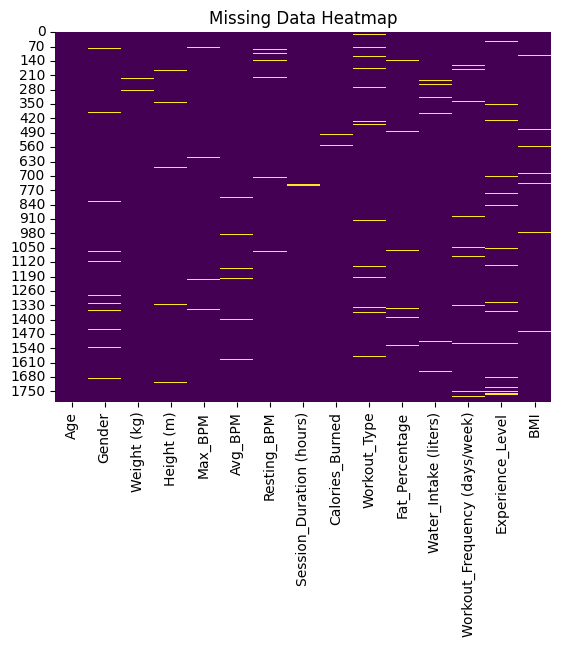

In [11]:

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [12]:
# Step 3: Handle missing values
# Impute numerical columns using the median
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Weight (kg)'] = df['Weight (kg)'].fillna(df['Weight (kg)'].median())
df['Height (m)'] = df['Height (m)'].fillna(df['Height (m)'].median())

# Impute categorical columns using the mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Workout_Type'] = df['Workout_Type'].fillna(df['Workout_Type'].mode()[0])

# Step 4: Display the cleaned data (optional)
print(df.head())

    Age  Gender  Weight (kg)  Height (m) Max_BPM  Avg_BPM  Resting_BPM  \
0  34.0  Female         86.7        1.86     174    152.0         74.0   
1  26.0  Female         84.7        1.83     166    156.0         73.0   
2  22.0    Male         64.8        1.85     187    166.0         64.0   
3  54.0  Female         75.3        1.82     187    169.0         58.0   
4  34.0  Female         52.8        1.74     177    169.0         66.0   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.12            712.0     Strength            12.8   
1                      1.00            833.0     Strength            27.9   
2                      1.24           1678.0       Cardio            28.7   
3                      1.45            628.0       Cardio            31.8   
4                      1.60           1286.0     Strength            26.4   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

In [13]:
df.duplicated().sum()

0

In [14]:
df.drop_duplicates()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,54.0,Male,88.5,2.00,173,134.0,58.0,1.11,1388.0,HIIT,27.7,3.7,3.0,2.0,36.73
1796,52.0,Male,84.3,1.69,164,169.0,54.0,0.77,1367.0,HIIT,32.6,2.9,3.0,2.0,15.11
1797,47.0,Male,70.1,1.84,188,129.0,67.0,1.20,1261.0,Strength,28.4,2.5,3.0,2.0,17.99
1798,35.0,Male,49.3,1.71,180,152.0,73.0,1.04,956.0,Cardio,32.9,1.7,4.0,3.0,12.65


In [15]:
# Checking for invalid entries (non-numeric) in a specific column
invalid_entries = df['Max_BPM'].apply(pd.to_numeric, errors='coerce').isna().sum()
print(f"Number of invalid entries in 'Max_BPM': {invalid_entries}")


Number of invalid entries in 'Max_BPM': 28


In [16]:
# Convert 'Max_BPM' to numeric, invalid entries become NaN
df['Max_BPM'] = pd.to_numeric(df['Max_BPM'], errors='coerce')

# Check for NaN values after conversion
nan_count = df['Max_BPM'].isna().sum()
print(f"Number of NaN values in 'Max_BPM' after conversion: {nan_count}")


Number of NaN values in 'Max_BPM' after conversion: 28


In [17]:
# Impute missing values in 'Max_BPM' with the median value
df['Max_BPM'] = df['Max_BPM'].fillna(df['Max_BPM'].median())

# Verify if all NaN values are filled
print(f"Number of NaN values in 'Max_BPM' after imputation: {df['Max_BPM'].isna().sum()}")


Number of NaN values in 'Max_BPM' after imputation: 0


In [18]:
# Check unique values in the 'Gender' column
gender_unique = df['Gender'].unique()
print(f"Unique values in 'Gender' column: {gender_unique}")

# Check unique values in the 'Workout_Type' column
workout_type_unique = df['Workout_Type'].unique()
print(f"Unique values in 'Workout_Type' column: {workout_type_unique}")


Unique values in 'Gender' column: ['Female' 'Male']
Unique values in 'Workout_Type' column: ['Strength' 'Cardio' 'HIIT' 'Yoga' '\\nStrength' '\\tCardio' '\\tYoga']


In [19]:
# Standardizing 'Gender' values
df['Gender'] = df['Gender'].replace({'M': 'Male', 'm': 'Male', 'F': 'Female', 'f': 'Female'})

# Check again for unique values after standardization
print(f"Unique values in 'Gender' after standardization: {df['Gender'].unique()}")


Unique values in 'Gender' after standardization: ['Female' 'Male']


In [20]:
# Standardizing 'Workout_Type' values (if necessary)
df['Workout_Type'] = df['Workout_Type'].replace({'Yoga': 'Yoga', 'Running': 'Running', 'Swimming': 'Swimming'})

# Check again for unique values after standardization
print(f"Unique values in 'Workout_Type' after standardization: {df['Workout_Type'].unique()}")


Unique values in 'Workout_Type' after standardization: ['Strength' 'Cardio' 'HIIT' 'Yoga' '\\nStrength' '\\tCardio' '\\tYoga']


In [21]:
import pandas as pd

# Assuming the dataset is loaded in df


# Step 1: BMI Validation
# Recalculate BMI using the formula: BMI = Weight / (Height ^ 2)
df['Calculated_BMI'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)

# Compare the recalculated BMI with the provided BMI
inconsistent_bmi = (df['BMI'] != df['Calculated_BMI'])
print(f"Number of inconsistencies in BMI: {inconsistent_bmi.sum()}")

# Recalculate BMI for inconsistent entries and update the BMI column
df.loc[inconsistent_bmi, 'BMI'] = df.loc[inconsistent_bmi, 'Calculated_BMI']

# Verify if the inconsistencies were fixed
print(f"Number of NaN values in 'BMI' after recalculation: {df['BMI'].isna().sum()}")

# Step 2: Create Workout Intensity column
df['Workout_Intensity'] = df['Avg_BPM'] / df['Max_BPM']

# Display the first few rows to check the new column
print(df[['Avg_BPM', 'Max_BPM', 'Workout_Intensity']].head())


Number of inconsistencies in BMI: 1800
Number of NaN values in 'BMI' after recalculation: 0
   Avg_BPM  Max_BPM  Workout_Intensity
0    152.0    174.0           0.873563
1    156.0    166.0           0.939759
2    166.0    187.0           0.887701
3    169.0    187.0           0.903743
4    169.0    177.0           0.954802


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

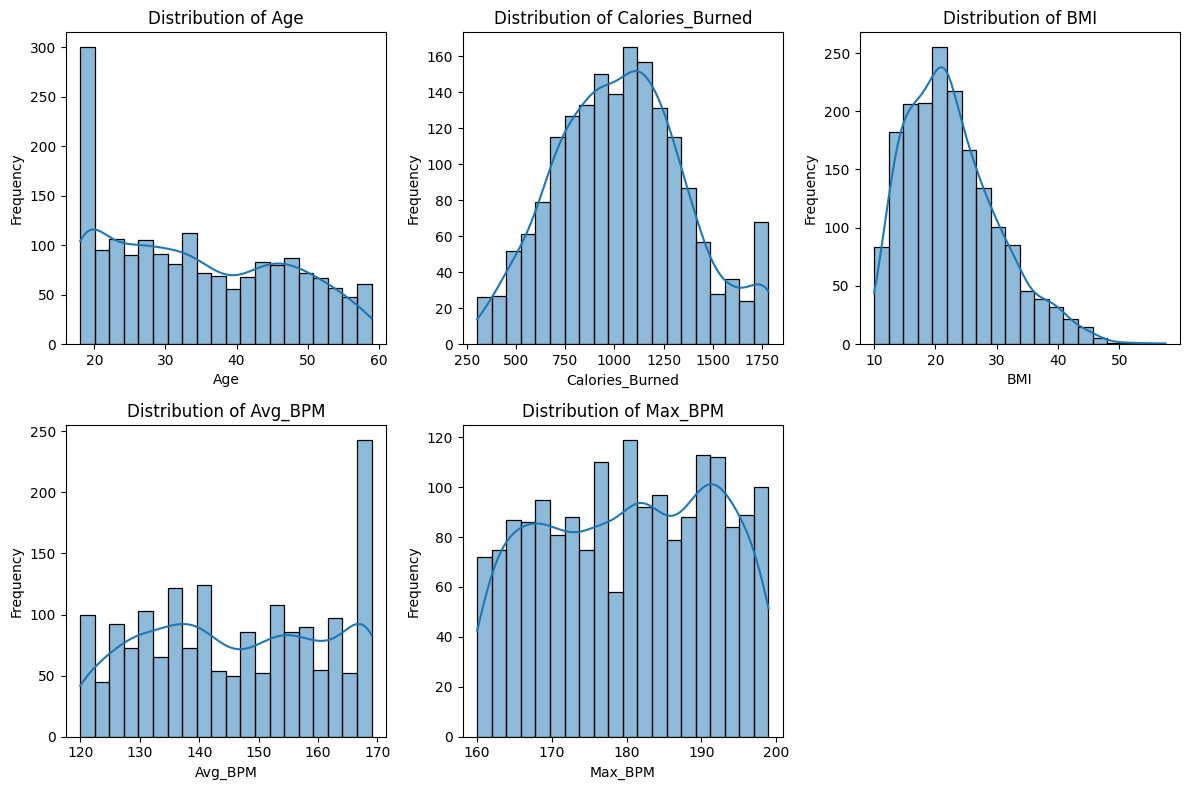

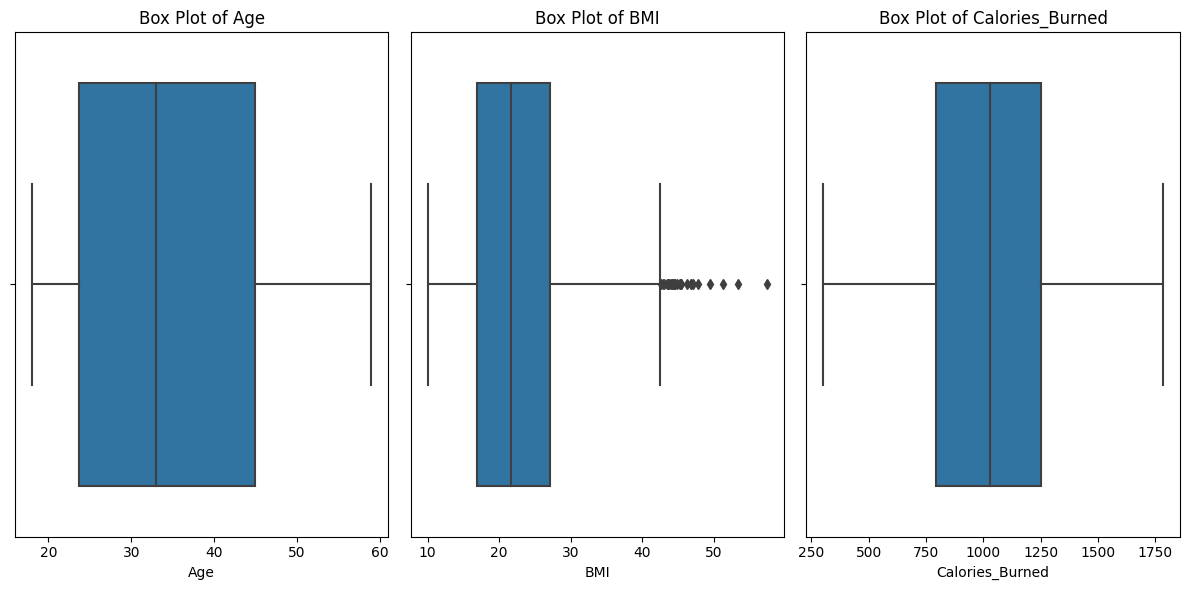

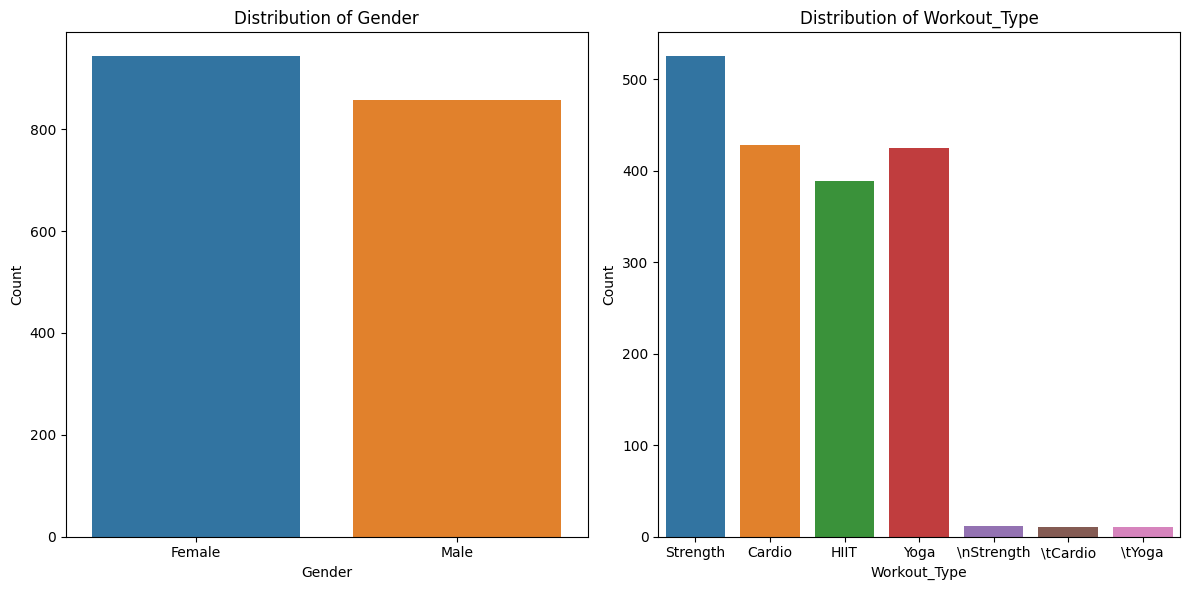

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataframe is loaded as df

# 1. Plot Histograms for Numeric Columns
numeric_columns = ['Age', 'Calories_Burned', 'BMI', 'Avg_BPM', 'Max_BPM']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Arrange plots in a grid
    sns.histplot(df[col], kde=True, bins=20)  # kde=True adds a density plot
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

# 2. Use Box Plots to Check for Outliers
outlier_columns = ['Age', 'BMI', 'Calories_Burned']

plt.figure(figsize=(12, 6))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(1, 3, i)  # Arrange plots in a grid
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# 3. Examine the Distribution of Categorical Columns Using Bar Plots
categorical_columns = ['Gender', 'Workout_Type']

plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)  # Arrange plots in a grid
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [23]:
import pandas as pd
import numpy as np

# Assuming the dataframe is loaded as df

# Function to detect outliers using IQR
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# List of numeric columns to check for outliers
numeric_columns = ['Age', 'BMI', 'Calories_Burned', 'Avg_BPM', 'Max_BPM']

# Detect outliers for numeric columns
outliers = detect_outliers(df, numeric_columns)

# Display outliers
for col, data in outliers.items():
    print(f"Outliers in {col}:")
    print(data)
    print("\n")

# Remove outliers for each numeric column
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Display the cleaned dataframe
print(df.head())


Outliers in Age:
Empty DataFrame
Columns: [Age, Gender, Weight (kg), Height (m), Max_BPM, Avg_BPM, Resting_BPM, Session_Duration (hours), Calories_Burned, Workout_Type, Fat_Percentage, Water_Intake (liters), Workout_Frequency (days/week), Experience_Level, BMI, Calculated_BMI, Workout_Intensity]
Index: []


Outliers in BMI:
       Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
20    26.0    Male        129.9        1.71    196.0    136.0         74.0   
21    22.0  Female        102.4        1.50    173.0    156.0         55.0   
23    18.0    Male        129.4        1.50    177.0    145.0         71.0   
33    20.0  Female        103.4        1.53    180.0    166.0         56.0   
42    23.0    Male        107.6        1.50    181.0    136.0         71.0   
129   31.0  Female        129.9        1.70    190.0    169.0         69.0   
266   33.0  Female        129.9        1.69    168.0    152.0         74.0   
378   19.0  Female        129.9        1.71    161

In [24]:
import pandas as pd

# Sample DataFrame
# Assuming df is your DataFrame with numeric columns
numeric_columns = ['Age', 'BMI', 'Calories_Burned', 'Avg_BPM', 'Max_BPM']

# Function to detect outliers using IQR
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Detect outliers
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Detect outliers
outliers = detect_outliers(df, numeric_columns)

# Display outliers
for col, data in outliers.items():
    print(f"Outliers in {col}:")
    print(data)
    print("\n")


Outliers in Age:
Empty DataFrame
Columns: [Age, Gender, Weight (kg), Height (m), Max_BPM, Avg_BPM, Resting_BPM, Session_Duration (hours), Calories_Burned, Workout_Type, Fat_Percentage, Water_Intake (liters), Workout_Frequency (days/week), Experience_Level, BMI, Calculated_BMI, Workout_Intensity]
Index: []


Outliers in BMI:
       Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
188   23.0  Female         95.6        1.50    196.0    152.0         56.0   
279   45.0    Male        129.9        1.75    197.0    154.0         73.0   
320   41.0  Female        117.7        1.67    189.0    123.0         58.0   
972   49.0    Male        110.8        1.62    162.0    169.0         59.0   
1154  48.0  Female        122.3        1.71    183.0    120.0         63.0   
1699  18.0  Female        129.9        1.76    168.0    135.0         50.0   

      Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
188                       0.50            639.0

In [25]:
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Display the cleaned DataFrame
print(df.head())


    Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.0  Female         86.7        1.86    174.0    152.0         74.0   
1  26.0  Female         84.7        1.83    166.0    156.0         73.0   
2  22.0    Male         64.8        1.85    187.0    166.0         64.0   
3  54.0  Female         75.3        1.82    187.0    169.0         58.0   
4  34.0  Female         52.8        1.74    177.0    169.0         66.0   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.12            712.0     Strength            12.8   
1                      1.00            833.0     Strength            27.9   
2                      1.24           1678.0       Cardio            28.7   
3                      1.45            628.0       Cardio            31.8   
4                      1.60           1286.0     Strength            26.4   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0        

In [26]:
for col in numeric_columns:
    # Apply log transformation (adding 1 to avoid log(0))
    df[col] = df[col].apply(lambda x: np.log(x + 1) if x > 0 else 0)

# Display transformed DataFrame
print(df.head())


        Age  Gender  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
0  3.555348  Female         86.7        1.86  5.164786  5.030438         74.0   
1  3.295837  Female         84.7        1.83  5.117994  5.056246         73.0   
2  3.135494    Male         64.8        1.85  5.236442  5.117994         64.0   
3  4.007333  Female         75.3        1.82  5.236442  5.135798         58.0   
4  3.555348  Female         52.8        1.74  5.181784  5.135798         66.0   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.12         6.569481     Strength            12.8   
1                      1.00         6.726233     Strength            27.9   
2                      1.24         7.425954       Cardio            28.7   
3                      1.45         6.444131       Cardio            31.8   
4                      1.60         7.160069     Strength            26.4   

   Water_Intake (liters)  Workout_Frequency (days/

In [27]:
for col in numeric_columns:
    lower_percentile = df[col].quantile(0.01)
    upper_percentile = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=lower_percentile, upper=upper_percentile)

# Display the capped DataFrame
print(df.head())


        Age  Gender  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
0  3.555348  Female         86.7        1.86  5.164786  5.030438         74.0   
1  3.295837  Female         84.7        1.83  5.117994  5.056246         73.0   
2  3.135494    Male         64.8        1.85  5.236442  5.117994         64.0   
3  4.007333  Female         75.3        1.82  5.236442  5.135798         58.0   
4  3.555348  Female         52.8        1.74  5.181784  5.135798         66.0   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.12         6.569481     Strength            12.8   
1                      1.00         6.726233     Strength            27.9   
2                      1.24         7.425954       Cardio            28.7   
3                      1.45         6.444131       Cardio            31.8   
4                      1.60         7.160069     Strength            26.4   

   Water_Intake (liters)  Workout_Frequency (days/

In [28]:
# Check the numeric columns and their counts of missing values
numeric_columns = df.select_dtypes(include=['number']).columns
print("Numeric Columns:", numeric_columns)

# Check for any missing values in numeric columns
print(df[numeric_columns].isnull().sum())


Numeric Columns: Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI', 'Calculated_BMI', 'Workout_Intensity'],
      dtype='object')
Age                               0
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                      19
Session_Duration (hours)         22
Calories_Burned                   0
Fat_Percentage                   15
Water_Intake (liters)            23
Workout_Frequency (days/week)    55
Experience_Level                 57
BMI                               0
Calculated_BMI                    0
Workout_Intensity                 0
dtype: int64


In [29]:
# Check if there are any columns with zero variance
zero_variance_columns = df[numeric_columns].loc[:, df[numeric_columns].nunique() == 1].columns
print("Zero Variance Columns:", zero_variance_columns)

# Drop columns with zero variance
df_cleaned = df.drop(columns=zero_variance_columns)

# Recalculate correlation matrix after removing zero variance columns
correlation_matrix = df_cleaned.select_dtypes(include=['number']).corr()

# Check the correlation matrix
print(correlation_matrix)


Zero Variance Columns: Index([], dtype='object')
                                    Age  Weight (kg)  Height (m)   Max_BPM  \
Age                            1.000000     0.019935   -0.038027 -0.006114   
Weight (kg)                    0.019935     1.000000   -0.018538  0.010403   
Height (m)                    -0.038027    -0.018538    1.000000  0.019689   
Max_BPM                       -0.006114     0.010403    0.019689  1.000000   
Avg_BPM                       -0.007812     0.043241   -0.036726 -0.060603   
Resting_BPM                    0.001152    -0.013326    0.000642 -0.017889   
Session_Duration (hours)       0.006861    -0.021564    0.043293  0.016586   
Calories_Burned               -0.015730     0.018431    0.015619 -0.005642   
Fat_Percentage                -0.024209     0.010277   -0.034879  0.020216   
Water_Intake (liters)         -0.048430    -0.014513   -0.036474  0.000337   
Workout_Frequency (days/week)  0.038753    -0.042598    0.011995 -0.042717   
Experience_Leve

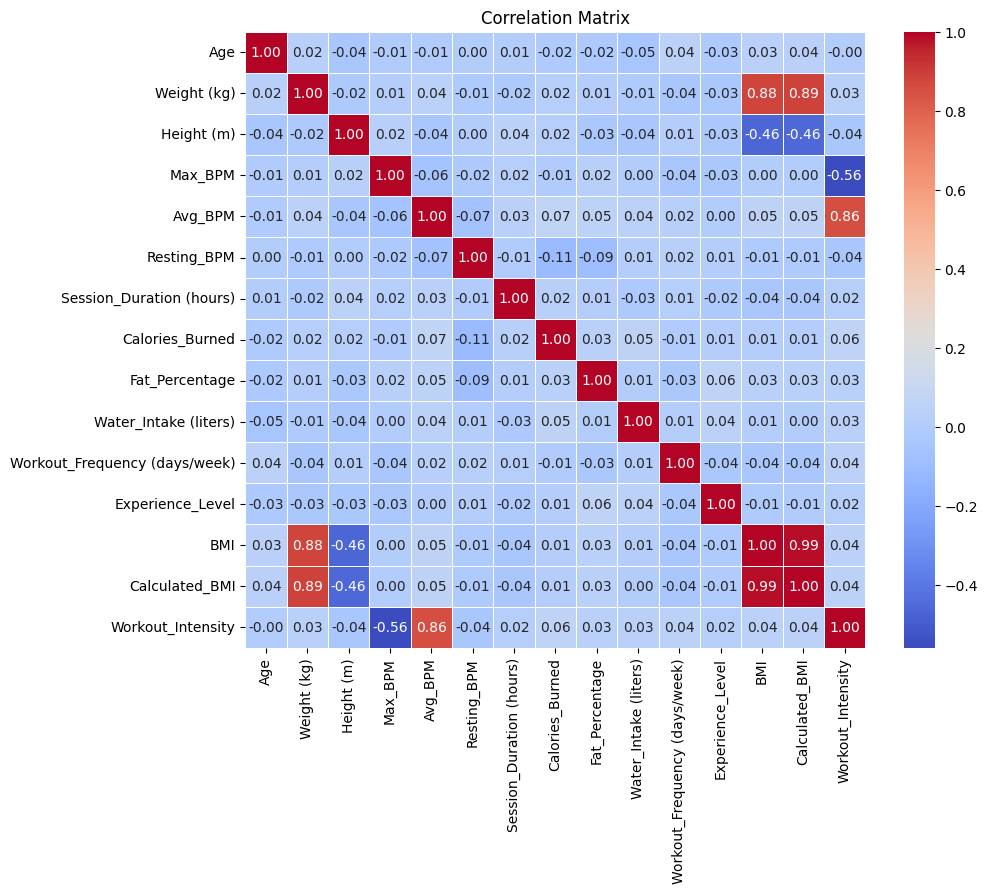

In [30]:
# Ensure the correlation matrix is not empty
if correlation_matrix.empty:
    print("Correlation matrix is empty. Unable to plot heatmap.")
else:
    # Create a heatmap for correlation
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()


In [31]:
sns.pairplot

<function seaborn.axisgrid.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)>

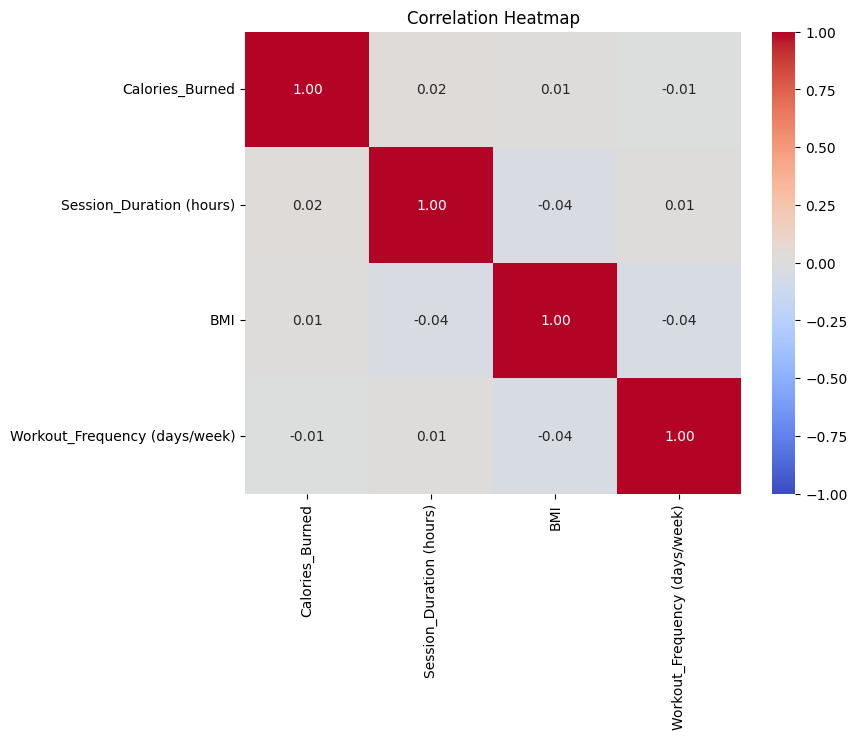

In [34]:
# Corrected correlation analysis using the correct column names
correlation_matrix = df[['Calories_Burned', 'Session_Duration (hours)', 'BMI', 'Workout_Frequency (days/week)']].corr()

# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


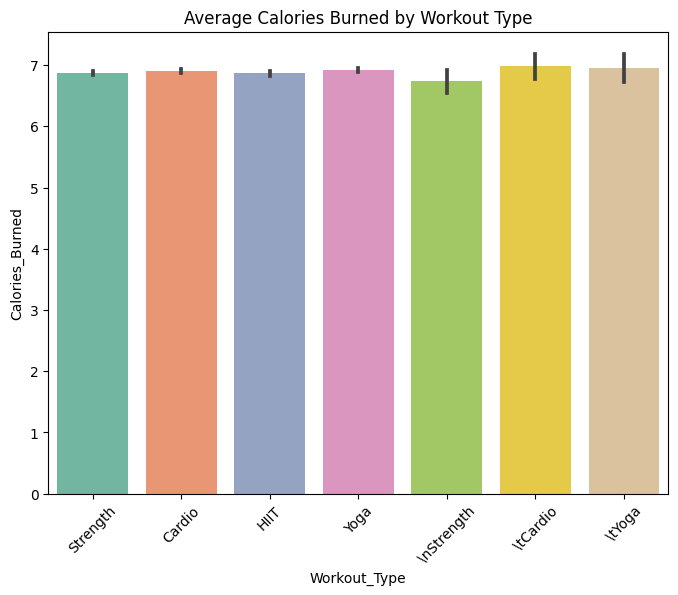

In [35]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Workout_Type', y='Calories_Burned', data=df, palette='Set2')
plt.title('Average Calories Burned by Workout Type')
plt.xticks(rotation=45)
plt.show()


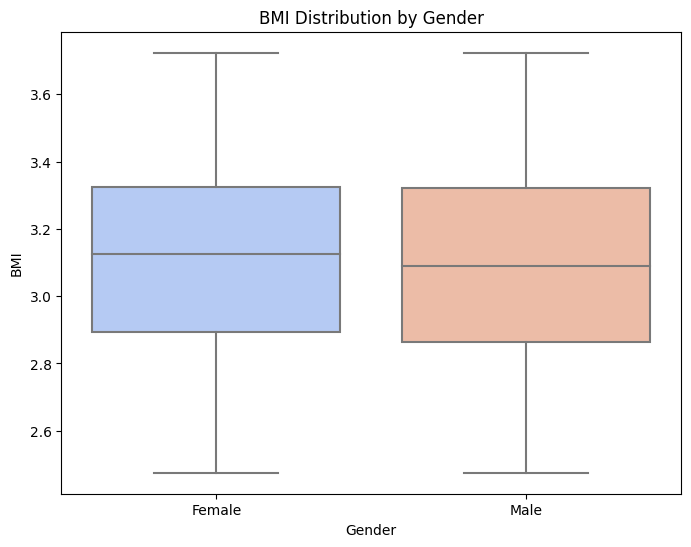

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='BMI', data=df, palette='coolwarm')
plt.title('BMI Distribution by Gender')
plt.show()


KeyError: 'Gender'

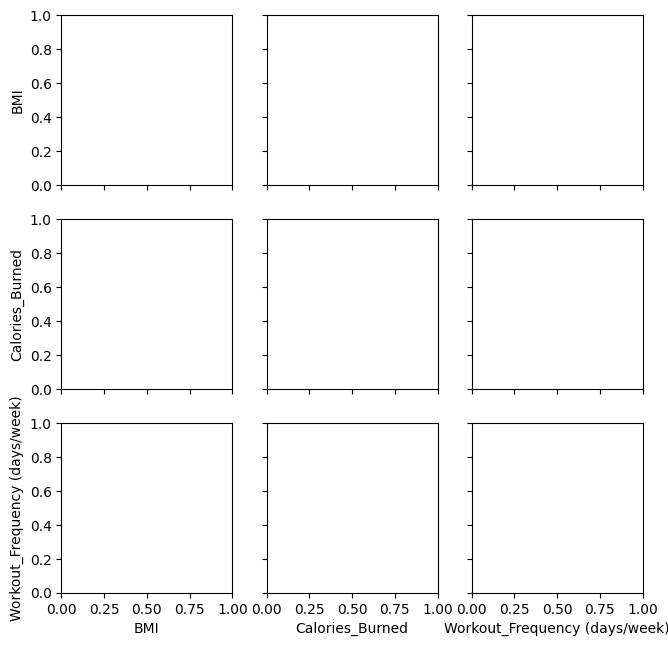

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns for the pair plot
pair_columns = ['BMI', 'Calories_Burned', 'Workout_Frequency (days/week)']

# Pair plot to visualize relationships between these variables
sns.pairplot(df[pair_columns], hue='Gender', palette='Set1')

# Adjust the title and display the plot
plt.suptitle('Pair Plot: BMI, Calories Burned, and Workout Frequency', y=1.02)
plt.show()


In [46]:
import pandas as pd

# One-Hot Encoding for 'Gender'
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# One-Hot Encoding for 'Workout_Type'
df = pd.get_dummies(df, columns=['Workout_Type'], drop_first=True)

# Display the first few rows to check the encoding
print(df.head())


        Age  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
0  3.555348         86.7        1.86  5.164786  5.030438         74.0   
1  3.295837         84.7        1.83  5.117994  5.056246         73.0   
2  3.135494         64.8        1.85  5.236442  5.117994         64.0   
3  4.007333         75.3        1.82  5.236442  5.135798         58.0   
4  3.555348         52.8        1.74  5.181784  5.135798         66.0   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                      1.12         6.569481            12.8   
1                      1.00         6.726233            27.9   
2                      1.24         7.425954            28.7   
3                      1.45         6.444131            31.8   
4                      1.60         7.160069            26.4   

   Water_Intake (liters)  ...       BMI  Calculated_BMI  Workout_Intensity  \
0                    2.4  ...  3.260428       25.060701           0.873563   
1                   

object
category


In [48]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [49]:
# Select columns for normalization
columns_to_normalize = ['Calories_Burned', 'Session_Duration (hours)', 'Workout_Frequency (days/week)']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Check the first few rows after normalization
print(df[columns_to_normalize].head())


   Calories_Burned  Session_Duration (hours)  Workout_Frequency (days/week)
0         0.431044                  0.413333                       1.000000
1         0.528288                  0.333333                       1.000000
2         0.962369                  0.493333                       0.333333
3         0.353282                  0.633333                       0.666667
4         0.797424                  0.733333                       0.666667


In [50]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Check the first few rows after standardization
print(df[columns_to_normalize].head())


   Calories_Burned  Session_Duration (hours)  Workout_Frequency (days/week)
0        -0.935633                 -0.728822                       1.754045
1        -0.479519                 -1.051675                       1.754045
2         1.556515                 -0.405968                      -0.349288
3        -1.300375                  0.159026                       0.702379
4         0.782849                  0.562593                       0.702379


In [56]:
df.columns = df.columns.str.replace(r'\n', '', regex=True).str.replace(r'\t', '', regex=True)
print(df.columns)

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI', 'Calculated_BMI', 'Workout_Intensity',
       'Gender_Male', 'Workout_Type_HIIT', 'Workout_Type_Strength',
       'Workout_Type_Yoga', 'Workout_Type_\nStrength', 'Workout_Type_\tCardio',
       'Workout_Type_\tYoga'],
      dtype='object')


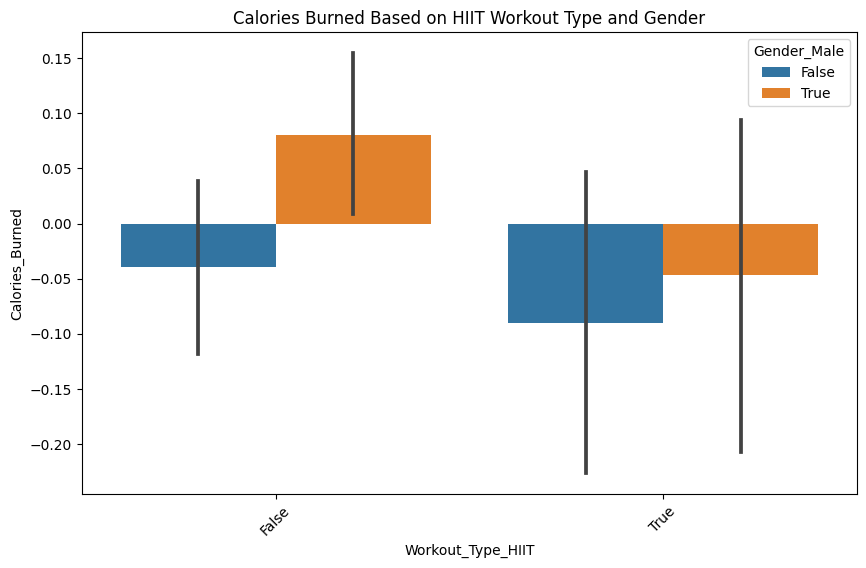

In [57]:
# Bar plot for Calories Burned based on Workout Type columns
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Workout_Type_HIIT', y='Calories_Burned', hue='Gender_Male')
plt.title('Calories Burned Based on HIIT Workout Type and Gender')
plt.xticks(rotation=45)
plt.show()


In [58]:
# Calculate correlation between Session_Duration and Calories_Burned
correlation = df['Session_Duration (hours)'].corr(df['Calories_Burned'])

print(f"Correlation between Session Duration and Calories Burned: {correlation}")


Correlation between Session Duration and Calories Burned: 0.02113481019802046


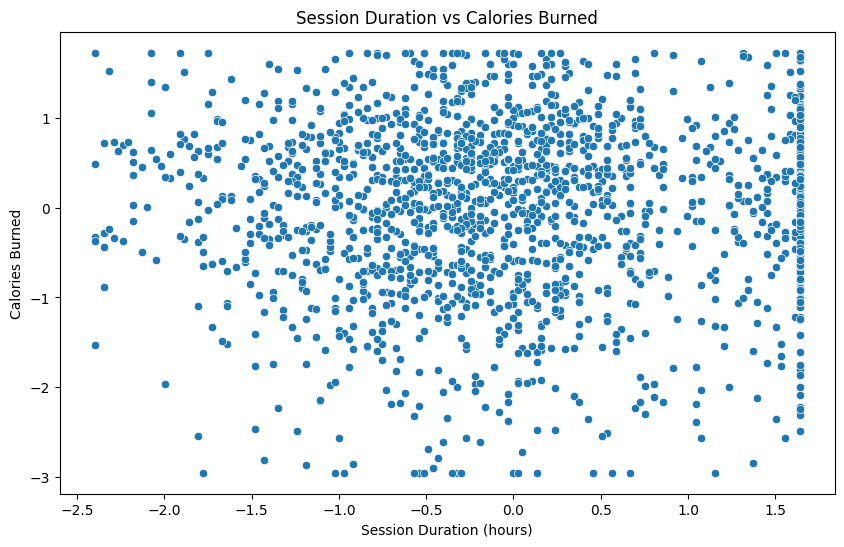

In [59]:
# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Session_Duration (hours)', y='Calories_Burned')
plt.title('Session Duration vs Calories Burned')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Calories Burned')
plt.show()


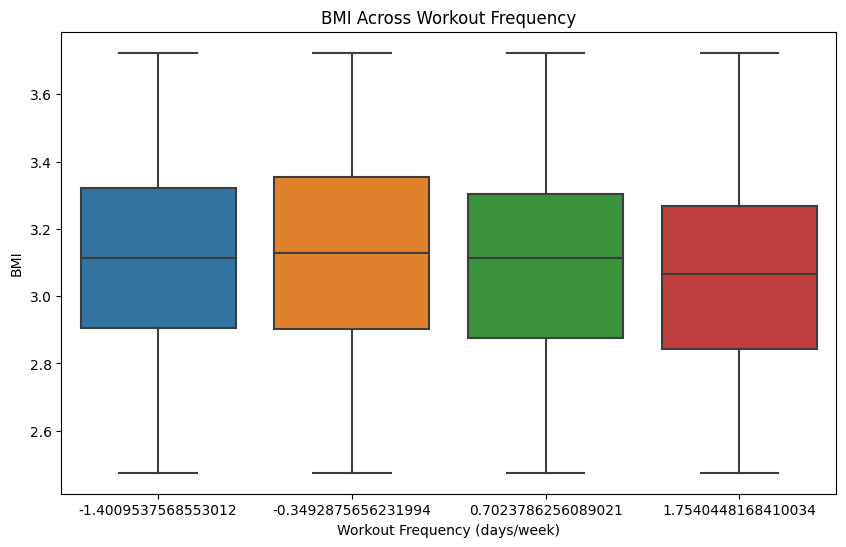

In [ ]:
# Box plot to visualize BMI across Workout Frequency
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Workout_Frequency (days/week)', y='BMI')
plt.title('BMI Across Workout Frequency')
plt.xlabel('Workout Frequency (days/week)')
plt.ylabel('BMI')
plt.show()
